# Make figures

To run this notebook, the GWP notebook must first be run

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))
plt.rcParams['figure.dpi'] = 300

default_size = 20
plt.rc('font', size=default_size)
plt.rc('axes', titlesize=default_size)     # fontsize of the axes title
plt.rc('axes', labelsize=default_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=default_size)    # legend fontsize
plt.rc('figure', titlesize=default_size*1.2)

color_h2 = 'lightblue'
color_ch4 = 'lightseagreen'
color_h2o = 'darkviolet'
color_o3 = 'gold'
color_aerosol='brown'

#For the RF per flux figures, use the same y-axis. 
ylim_rf_fig = 0.7

In [2]:
filepath= r"./output/"
df_table_per_flux = pd.read_csv(filepath+'table_per_flux_h2.csv',index_col=0)
df_table_per_flux = df_table_per_flux.drop('CNTR')

In [3]:
sorted_list = ['antro1', 
               'H2_avi'] 
senslist = sorted_list
senslist = [sub.replace('antro', 'anthro') for sub in senslist]

In [4]:
df_table_per_flux
df_table_per_flux = df_table_per_flux.reindex(sorted_list)
df_table_per_flux 

,deltaH2,surf_h2_per_h2_flux,surf_ch4_per_h2_flux,ch4_flux_per_h2_flux,ch4_rf_per_h2_flux,ozone_rf_per_h2_flux,h2o_rf_per_h2_flux
antro1,0.95,6.26,1.12,0.31,0.43,0.22,NaN
H2_avi,0.71,6.38,1.18,0.32,0.46,0.22,NaN


In [5]:
df_feedback_factor = pd.read_csv(filepath+'feedback_factor_ch4.csv',index_col=0,header=0)
df_feedback_factor

,antro1,H2_avi,SSP119,SSP434,SSP585
OSLOCTM,1.46,1.46,1.52,1.71,1.67


In [6]:
df_flux = df_table_per_flux['deltaH2']
df_flux.index

Index(['antro1', 'H2_avi'], dtype='object')

In [7]:
df_table_per_flux_ch4 = pd.read_csv(filepath+'table_per_flux_ch4.csv',index_col=0)
df_table_per_flux_ch4

,deltaCH4,surf_ch4_per_ch4_flux,h2_flux_per_ch4_flux,ozone_rf_per_ch4_flux,h2o_rf_per_ch4_flux
CNTR,49.7,3.65,0.02,0.82,0.19
antro1,49.7,3.65,0.02,0.82,0.19
H2_avi,49.7,3.65,0.02,0.82,0.19
SSP119,37.8,3.78,0.06,0.89,0.22
SSP434,52.1,4.27,0.06,0.84,0.24
SSP585,58.6,4.17,0.06,0.85,0.23


## Surface H2 concentration by 1 Tg H2/yr

In [8]:
tittel = 'Surface H$_2$ per H$_2$ flux'
ytittel ='[ppb H$_2$/(Tg H$_2$ yr$^{-1}$)]'
field = 'surf_h2_per_h2_flux'
legend = False 

In [9]:
plot_values = df_table_per_flux[field]

plot_values

antro1   6.26
H2_avi   6.38
Name: surf_h2_per_h2_flux, dtype: float64

[]

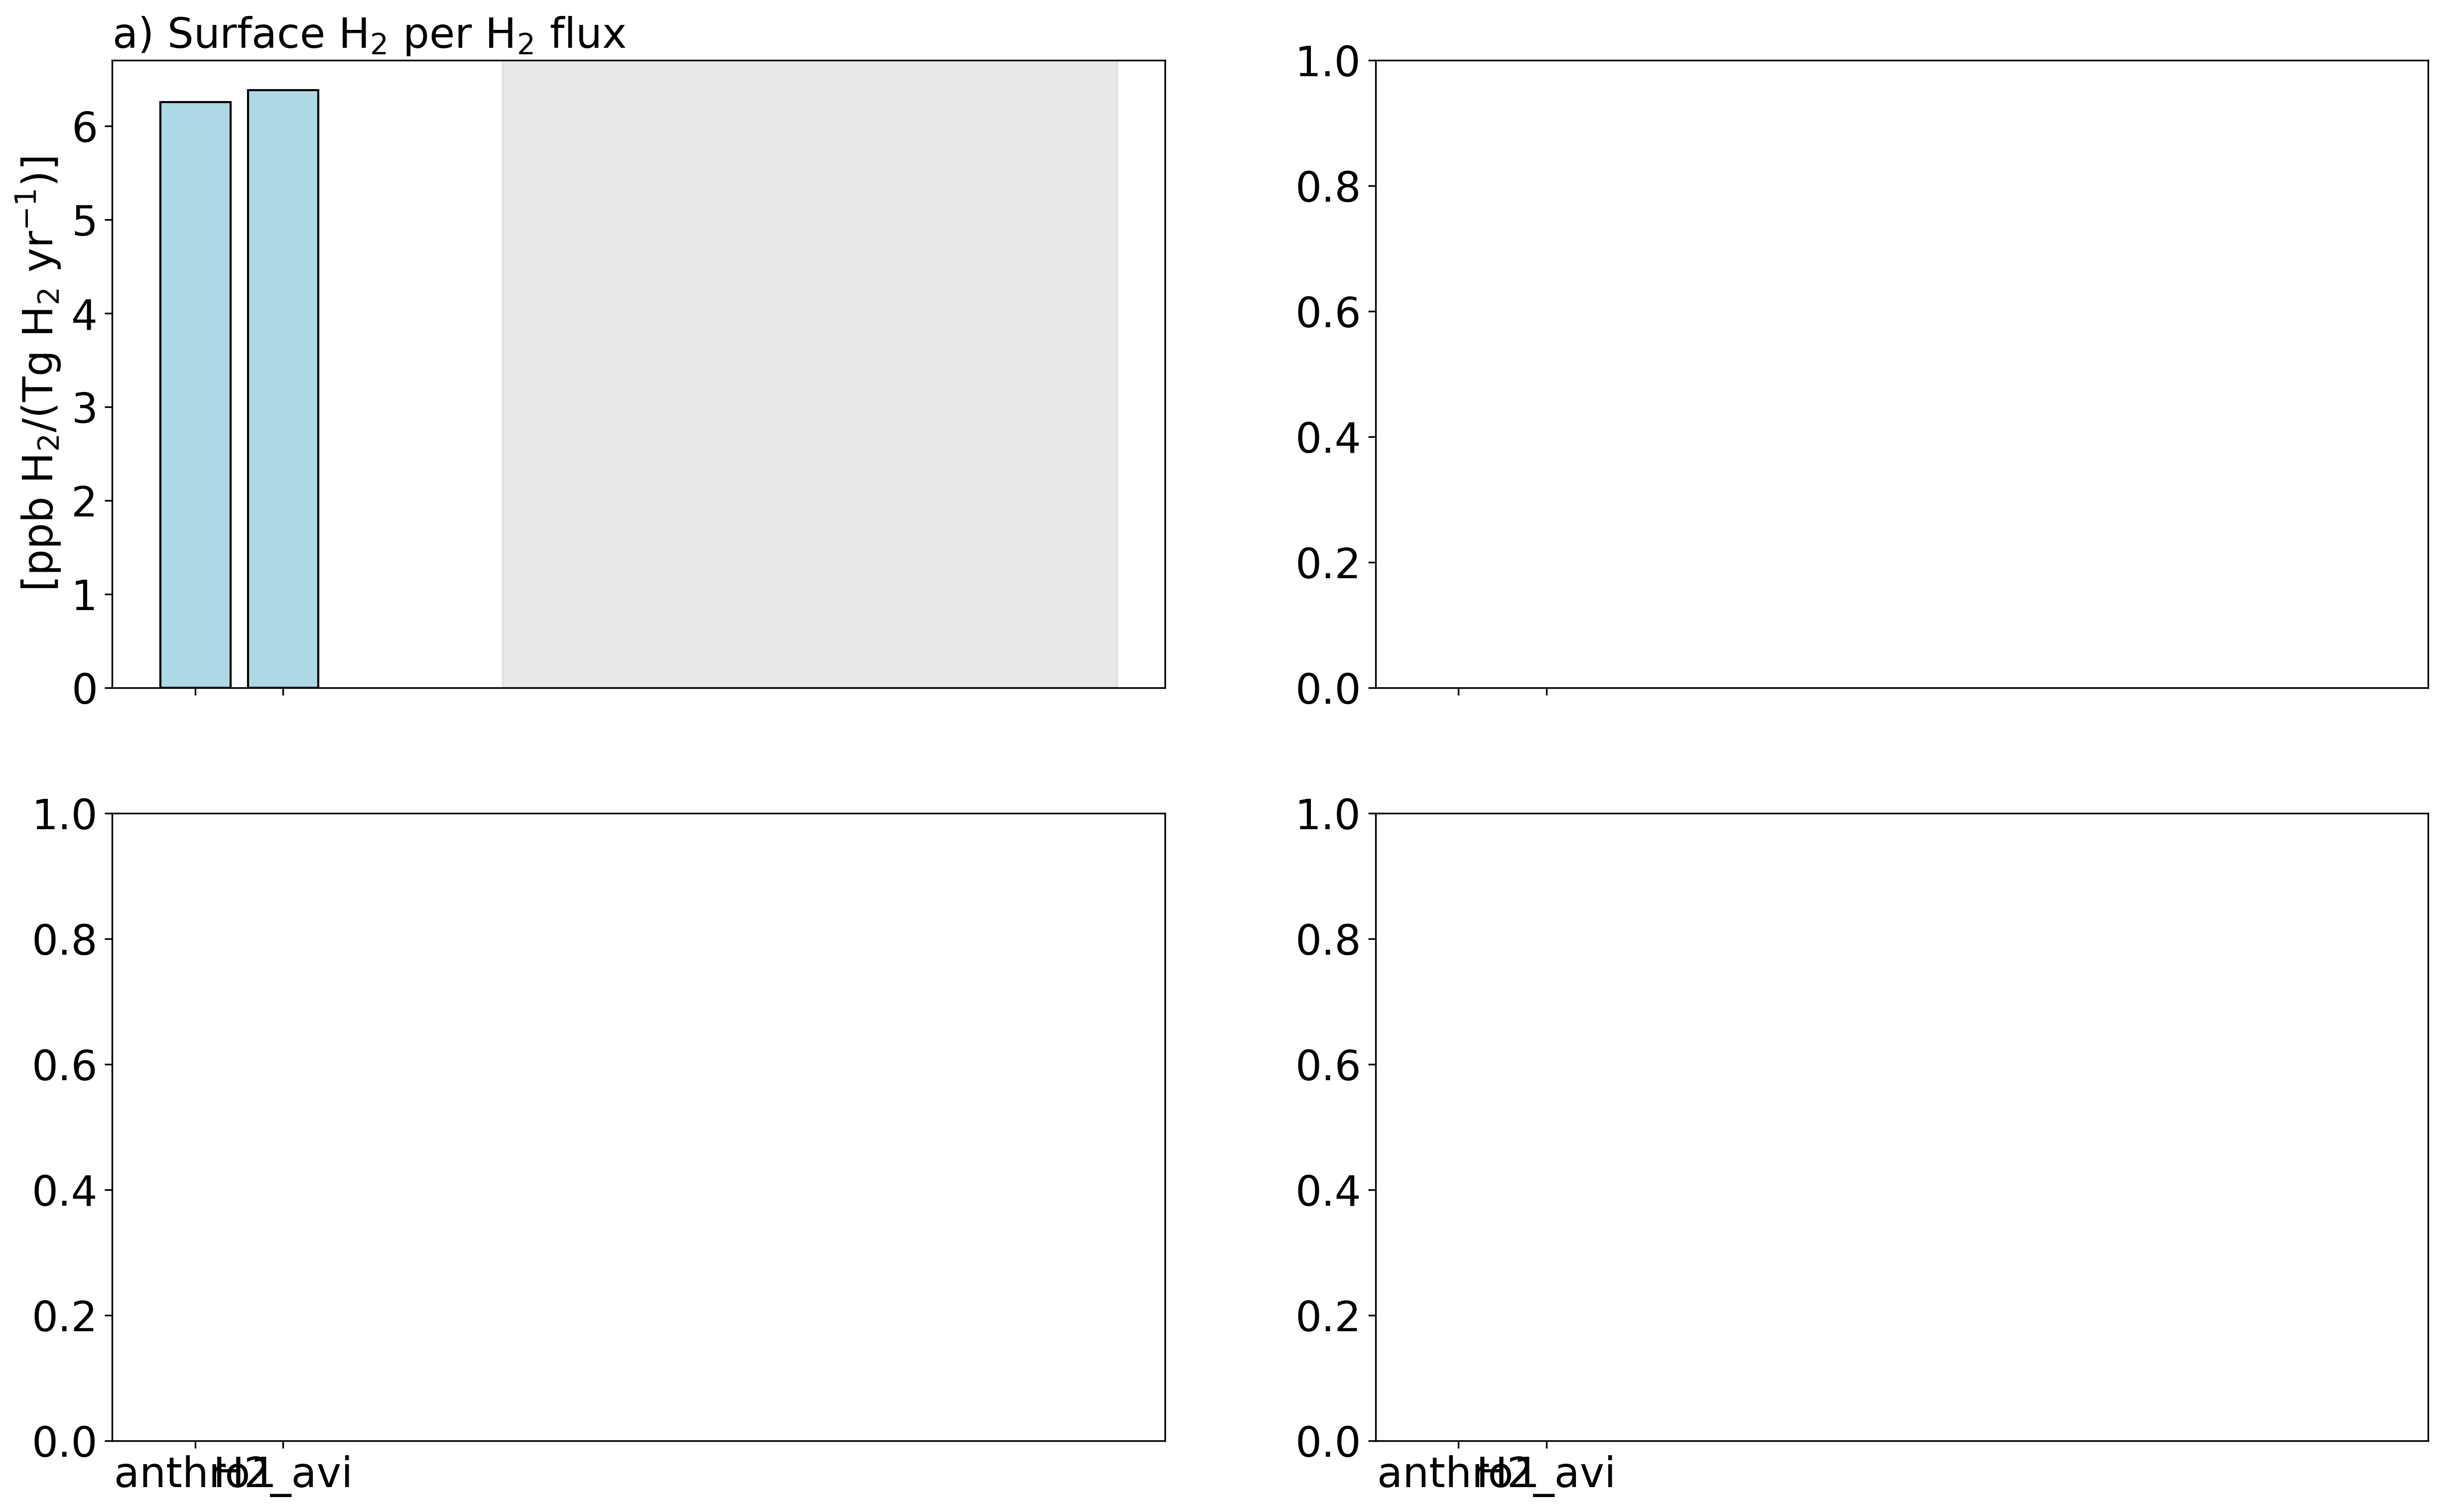

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(20,12))
axs=axs.flatten()

ax = axs[0]
letter = 'a)'
for m,model in enumerate(plot_values.index):

    ax.bar(m,plot_values.loc[model],edgecolor='black',color=color_h2,label=model)
    

ax.axvspan(3.5, 10.5, alpha=0.5, color='lightgray',zorder=-10)


ax.set_title(letter + ' '+ tittel, loc='left')
ax.set_ylabel(ytittel)
if legend:
    ax.legend()

ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(senslist, rotation=45,horizontalalignment="right")


Text to manusxript:

In [11]:
plot_values.loc[['antro1','H2_avi']]

antro1   6.26
H2_avi   6.38
Name: surf_h2_per_h2_flux, dtype: float64

## Methane RF per flux

In [12]:
tittel = 'Methane ERF per H$_2$ flux'
ytittel ='[mW m$^{-2}$/(Tg H$_2$ yr$^{-1}$)]'
field = 'ch4_rf_per_h2_flux'
legend = False


In [13]:
df_feedback_factor
feedback_factor = df_feedback_factor
feedback_frac = 1.0 - (1.0/feedback_factor)
feedback_frac

,antro1,H2_avi,SSP119,SSP434,SSP585
OSLOCTM,0.32,0.32,0.34,0.42,0.40


In [14]:
plot_values = df_table_per_flux[field]

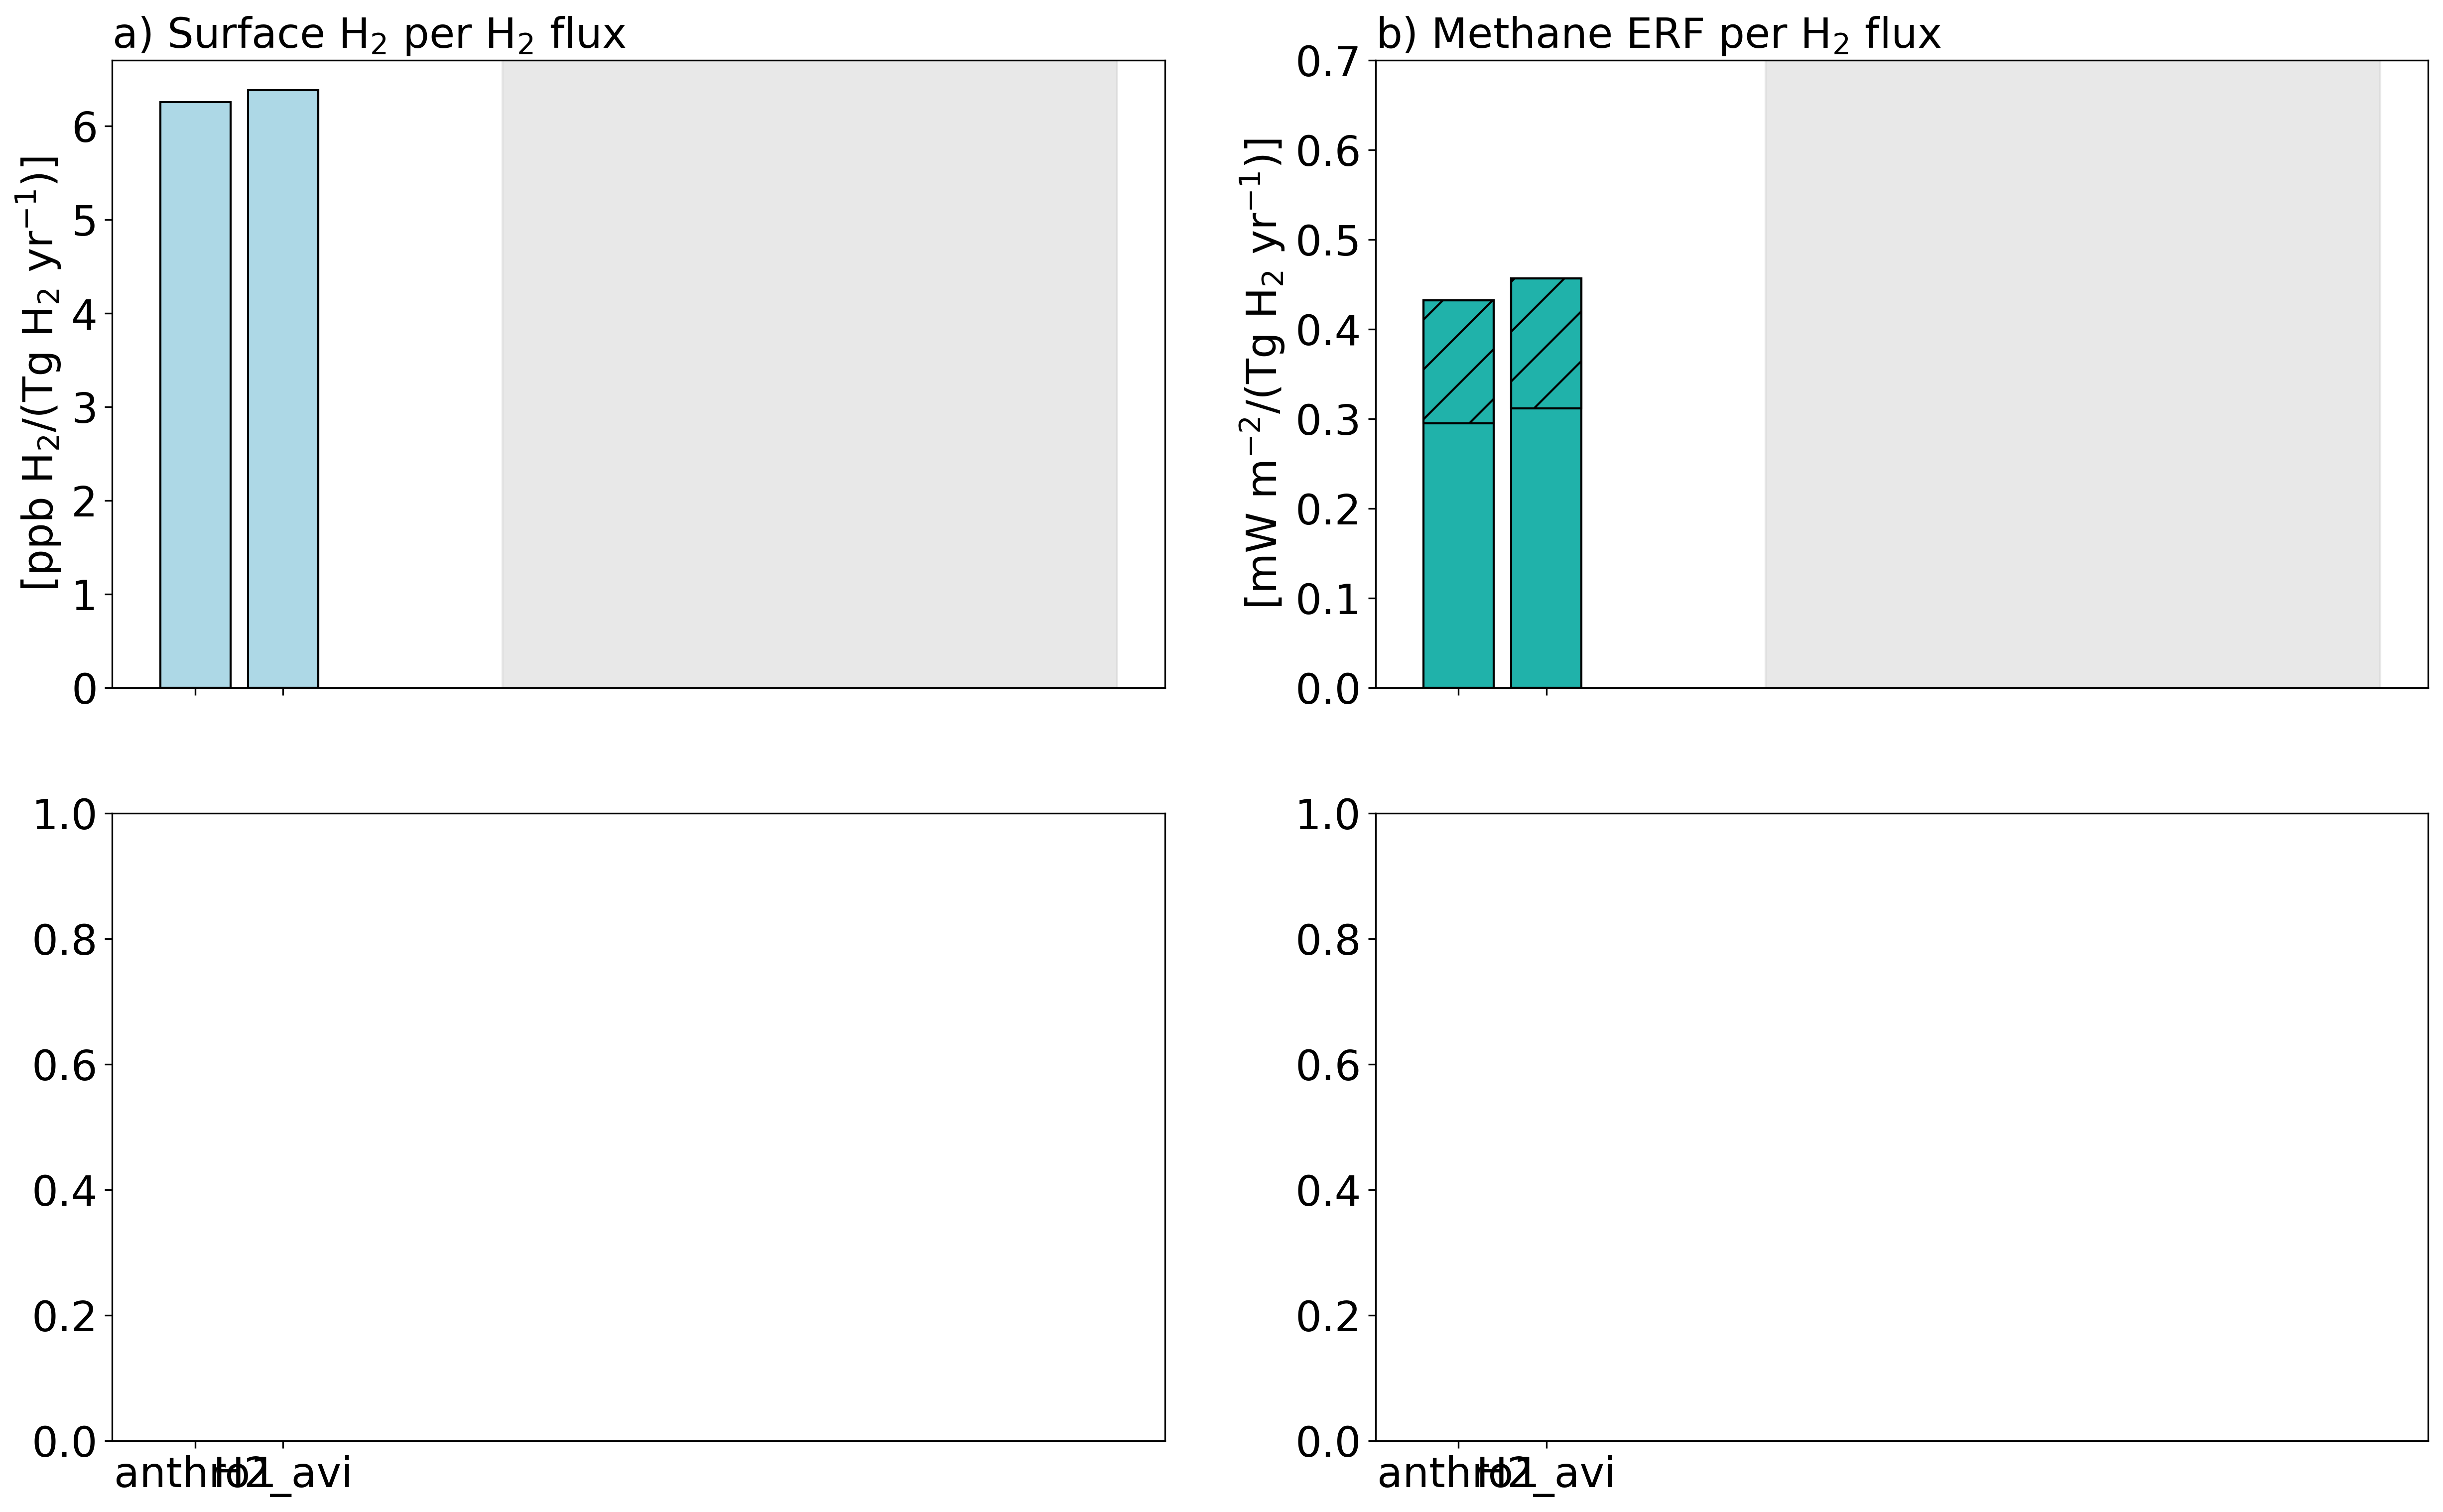

In [15]:
ax=axs[1]
letter = 'b)'
for m,model in enumerate(plot_values.index):

    ax.bar(m,plot_values.loc[model],edgecolor='black',color=color_ch4,label=model)
   
    #Hatch the feedback factor part
    ax.bar(m,plot_values.loc[model]*feedback_frac[model],bottom=plot_values.loc[model]*(1.0-feedback_frac[model]),fill=False,edgecolor='black',hatch='/')

ax.axvspan(3.5, 10.5, alpha=0.5, color='lightgray',zorder=-10)

ax.set_title(letter + ' '+ tittel, loc='left')
ax.set_ylabel(ytittel)

ax.set_ylim(top=ylim_rf_fig)
if legend:
    ax.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(senslist, rotation=45,horizontalalignment="right")

fig

## Ozone RF per flux 

In [16]:
tittel = 'Ozone ERF per H$_2$ flux'
ytittel ='[mW m$^{-2}$/(Tg H$_2$ yr$^{-1}$)]'
field = 'ozone_rf_per_h2_flux'
legend = False 

In [17]:
field_ch4 = field.replace('h2_','ch4_')

In [18]:
#Direct effect:
plot_values = df_table_per_flux[field]

In [19]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']

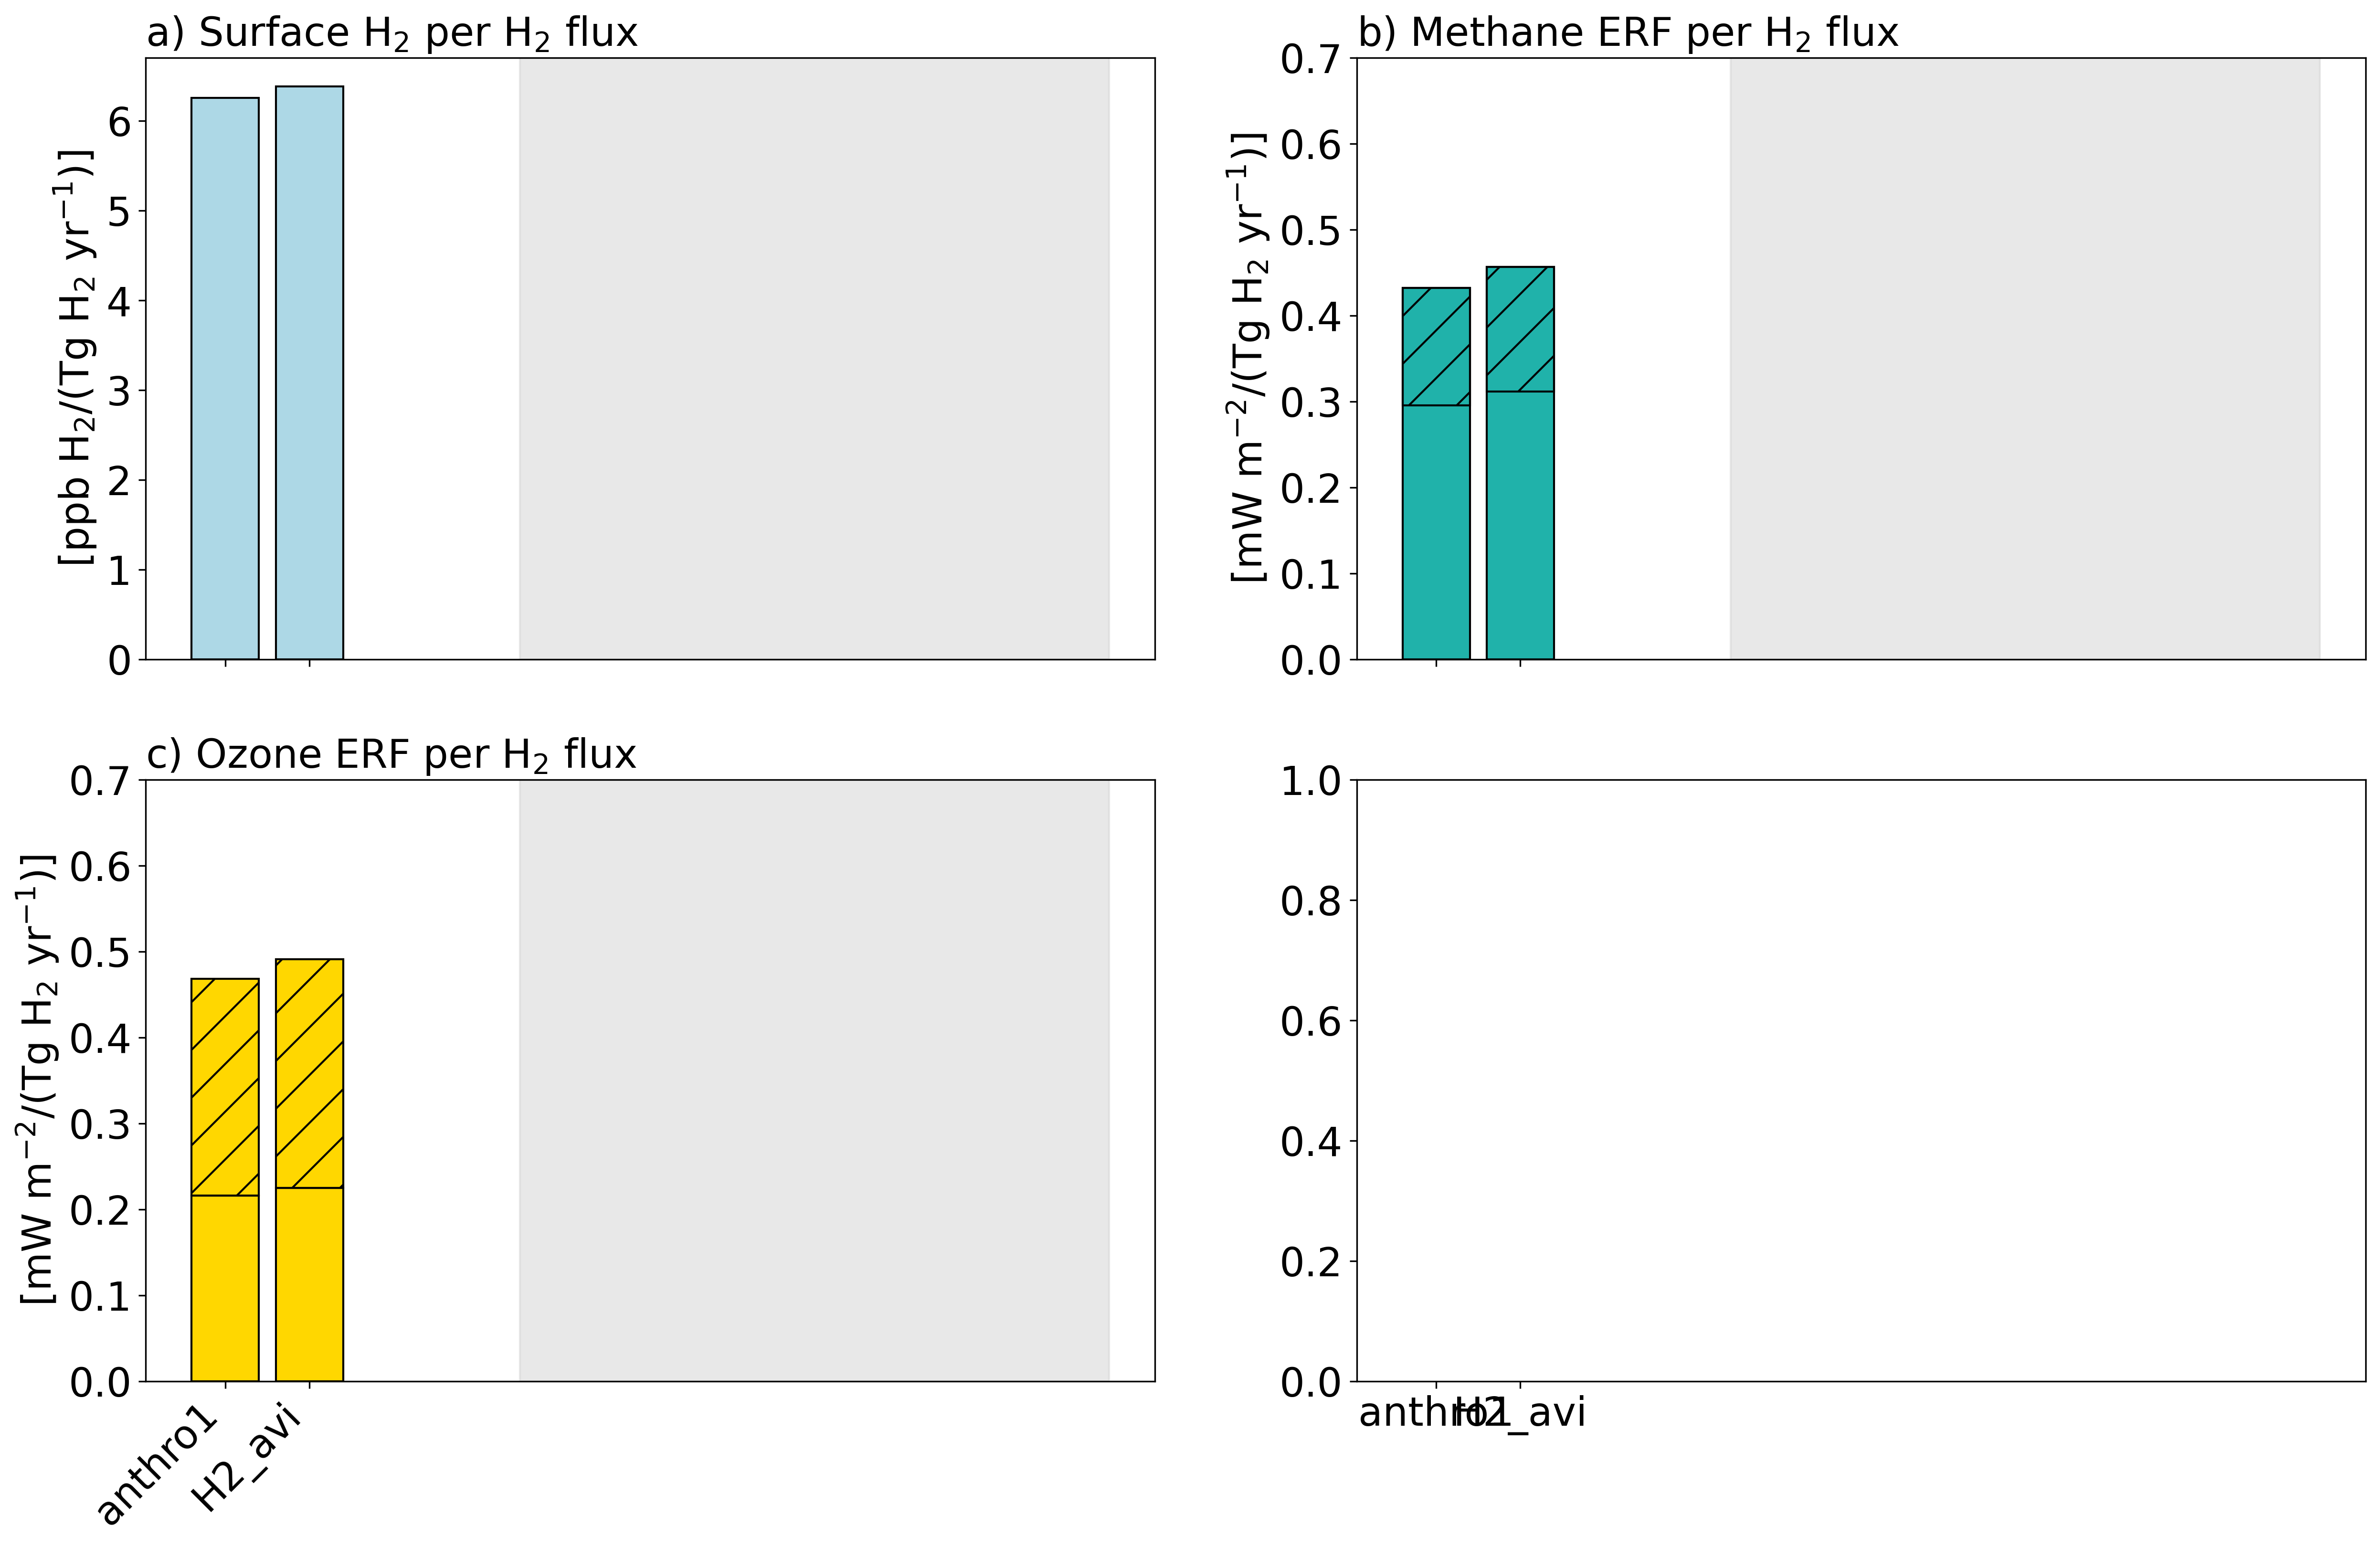

In [20]:
ax=axs[2] #plt.figure(figsize=(6*2,4*2))
letter = 'c)'
for m,model in enumerate(plot_values.index):  
    ax.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor=color_o3,color=color_o3,label=model)
    ax.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=color_o3)
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        ax.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        ax.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')


ax.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    


ax.axvspan(3.5, 10.5, alpha=0.5, color='lightgray',zorder=-10)

ax.set_title(letter + ' '+ tittel, loc='left')
ax.set_ylabel(ytittel)
ax.set_ylim(top=ylim_rf_fig)

if legend:
    ax.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(senslist, rotation=45,horizontalalignment="right")
fig

## Strat. H2O RF by 1 Tg H2

In [21]:
tittel = 'Stratospheric H$_2$O ERF per H$_2$ flux'
ytittel ='[mW m$^{-2}$/(Tg H$_2$ yr$^{-1}$)]'
field = 'h2o_rf_per_h2_flux'
legend = False

In [22]:
field_ch4 = field.replace('h2_','ch4_')

In [23]:
#Direct effect:
plot_values = df_table_per_flux[field]

In [24]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']

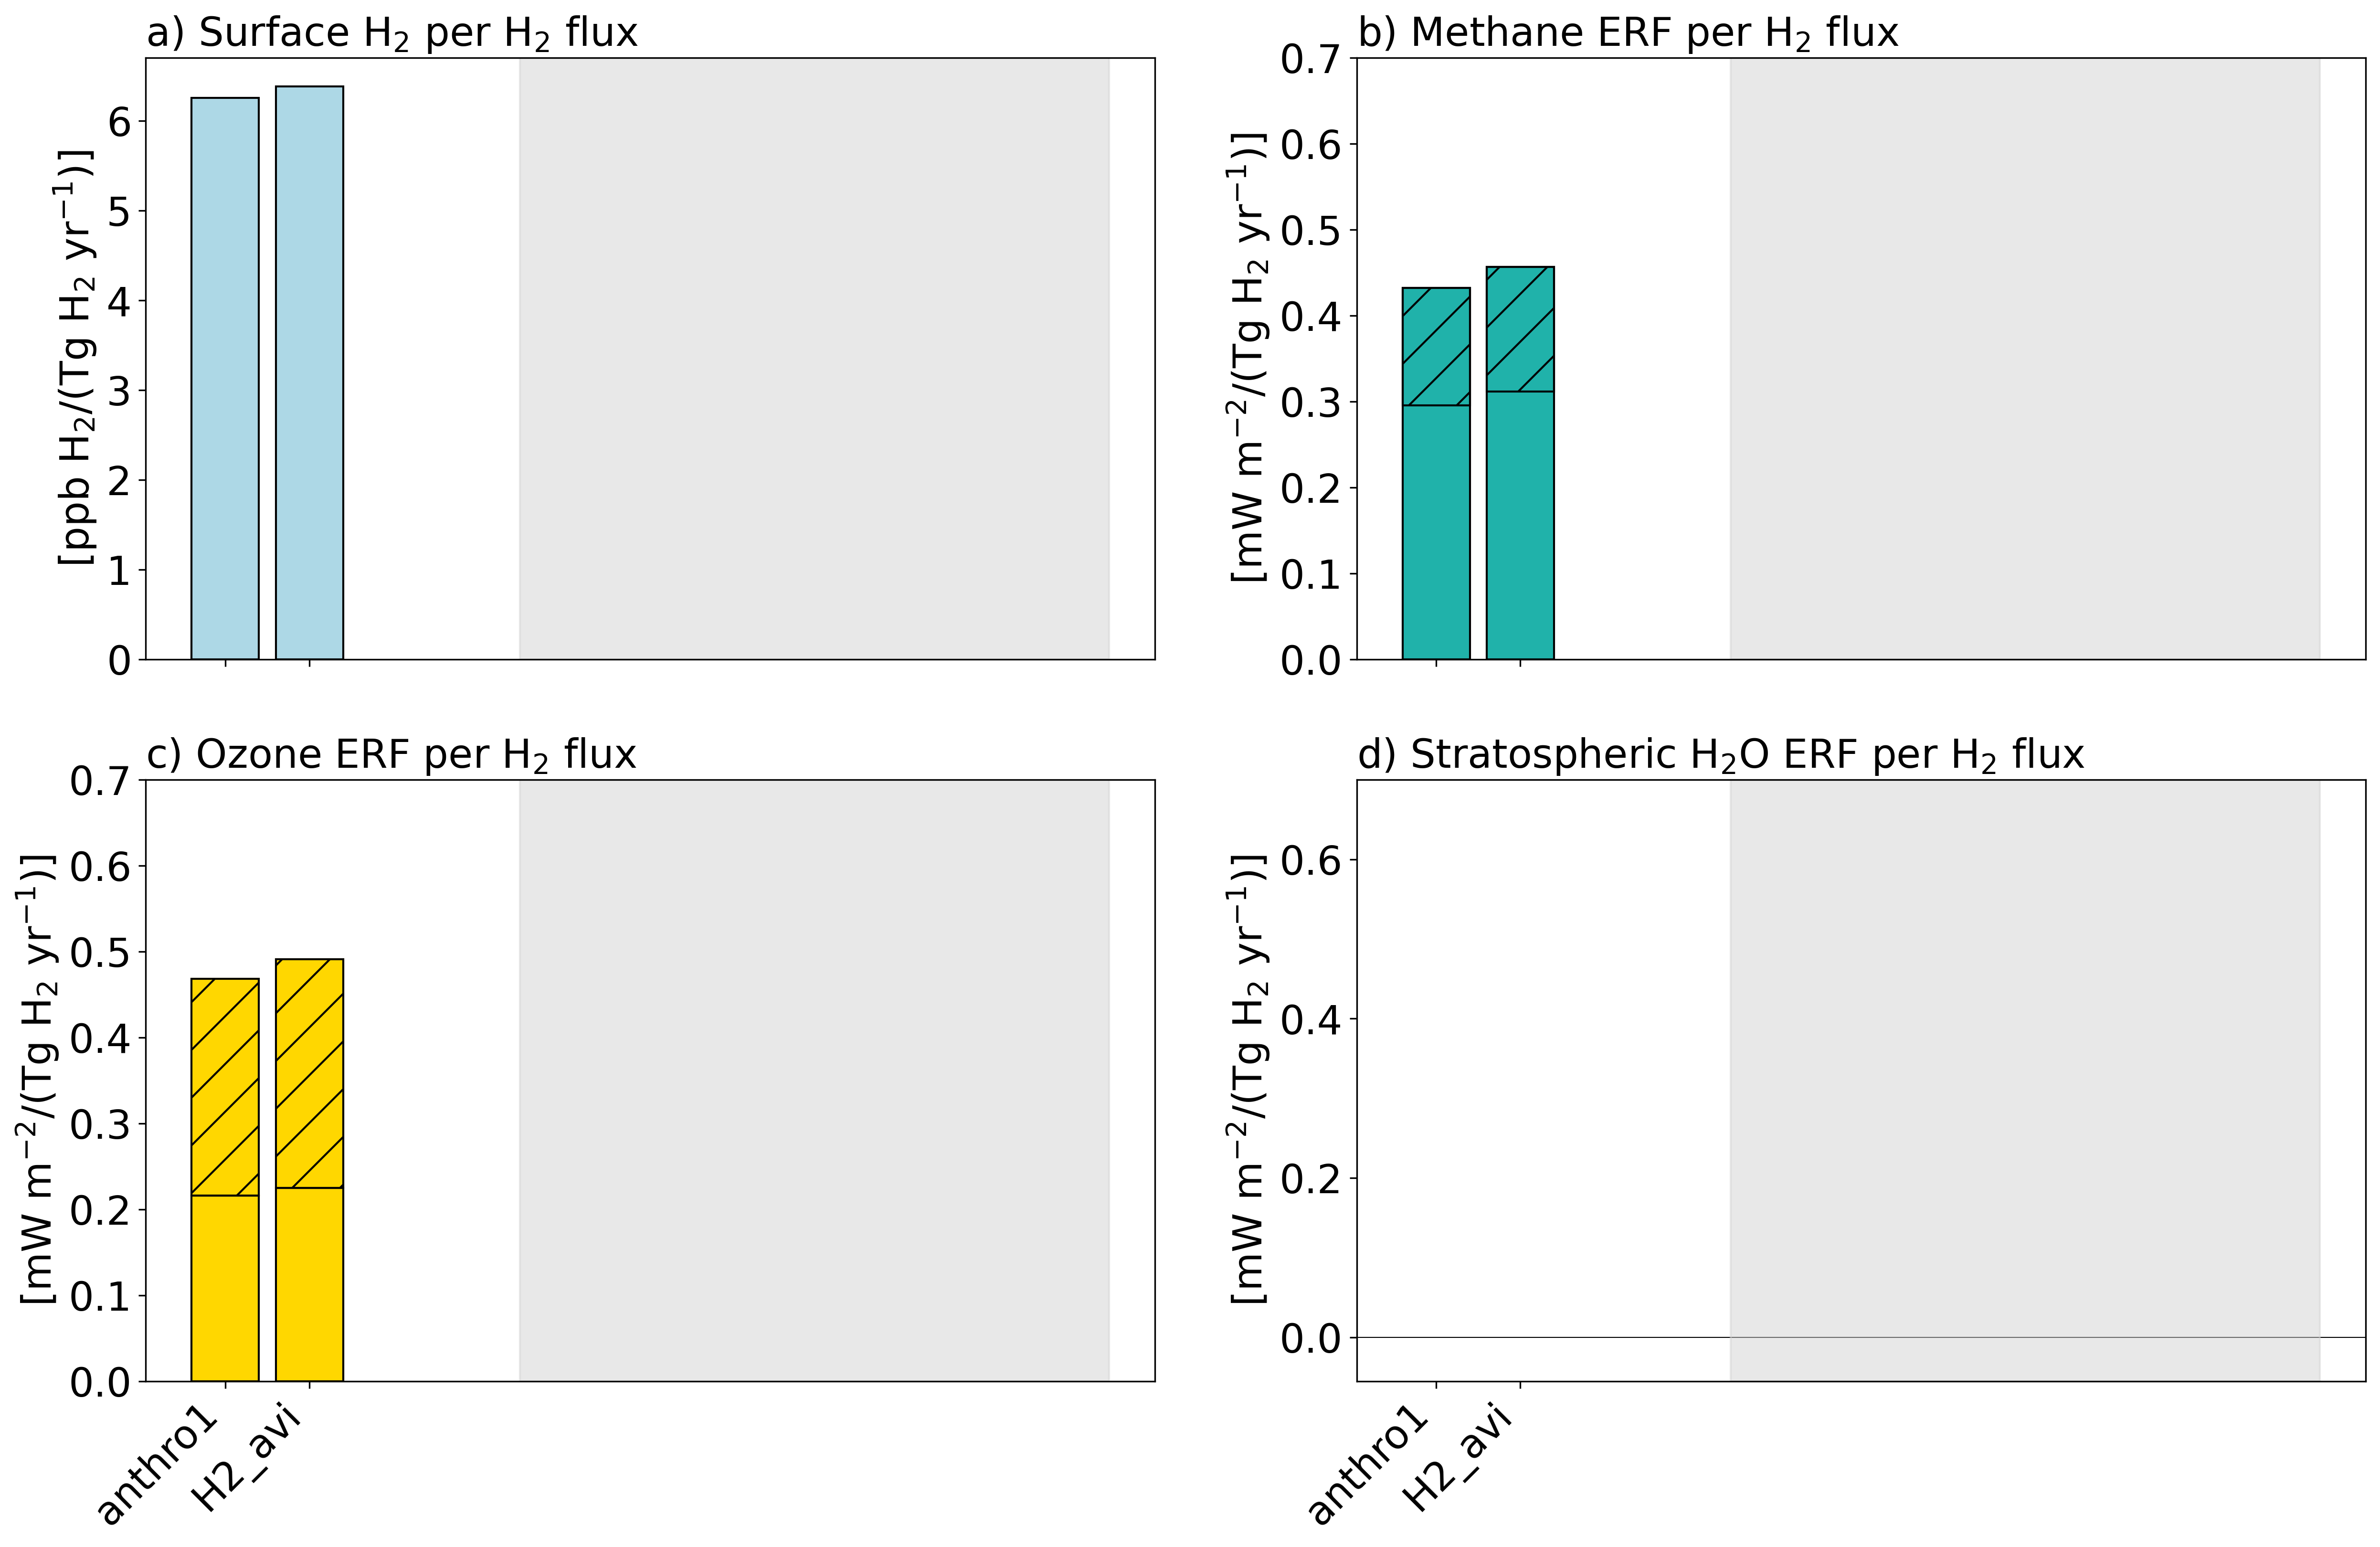

<Figure size 1920x1440 with 0 Axes>

In [25]:
ax=axs[3] #plt.figure(figsize=(6*2,4*2))
letter = 'd)'
for m,model in enumerate(plot_values.index):
    
    ax.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor=color_h2o,color=color_h2o,label=model)
    ax.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=color_h2o)
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        ax.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        ax.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    
ax.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    


ax.axvspan(3.5, 10.5, alpha=0.5, color='lightgray',zorder=-10)

ax.set_title(letter + ' '+ tittel, loc='left')
ax.set_ylabel(ytittel)
ax.set_ylim(top=ylim_rf_fig)


if legend:
    ax.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(senslist, rotation=45,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/Fig_per_flux.png', transparent=True)
fig